# Single security RSI25

In [1]:
import sys
import datetime
import pyfolio as pf
import pandas as pd

import backtrader as bt

from strats import RSI25

%load_ext autoreload
%autoreload 2

In [2]:
# create data feed
data = bt.feeds.YahooFinanceData(dataname='SPY', fromdate=datetime.datetime(2011, 1, 5),
    todate=datetime.datetime(2017, 11, 10))

In [3]:
# create cerebro entity
cerebro = bt.Cerebro()

In [4]:
# set 1mn as initial cash
cerebro.broker.set_cash(1e6)

In [5]:
# add strategy
cerebro.addstrategy(RSI25)

0

In [6]:
# add data feed
cerebro.adddata(data)

In [7]:
# pyfolio analyzer for performance analysis
cerebro.addanalyzer(bt.analyzers.PyFolio)

In [8]:
# run strat
strat = cerebro.run()

In [10]:
# pyfolio-yzer
pyfolio = strat[0].analyzers.getbyname('pyfolio')

In [11]:
# get stats
returns, positions, transactions, gross_lev = pyfolio.get_pf_items()


In [41]:
# SPY as benchmark
spy = pd.read_csv('data/ETFs/spy.us.txt', parse_dates=['Date'], index_col='Date')
spy.index = spy.index.tz_localize('UTC')
spy_rets = spy['Close'].pct_change().dropna()
spy_rets = spy_rets.loc[returns.index]

Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,1.90,2015-12-16,2016-01-20,2016-02-17,46
1,1.77,2012-04-17,2012-05-18,2012-10-04,123
2,1.30,2014-01-30,2014-02-03,2014-02-07,7
3,1.24,2015-08-21,2015-08-25,2015-08-26,4
4,0.87,2015-07-07,2015-07-08,2015-07-13,5


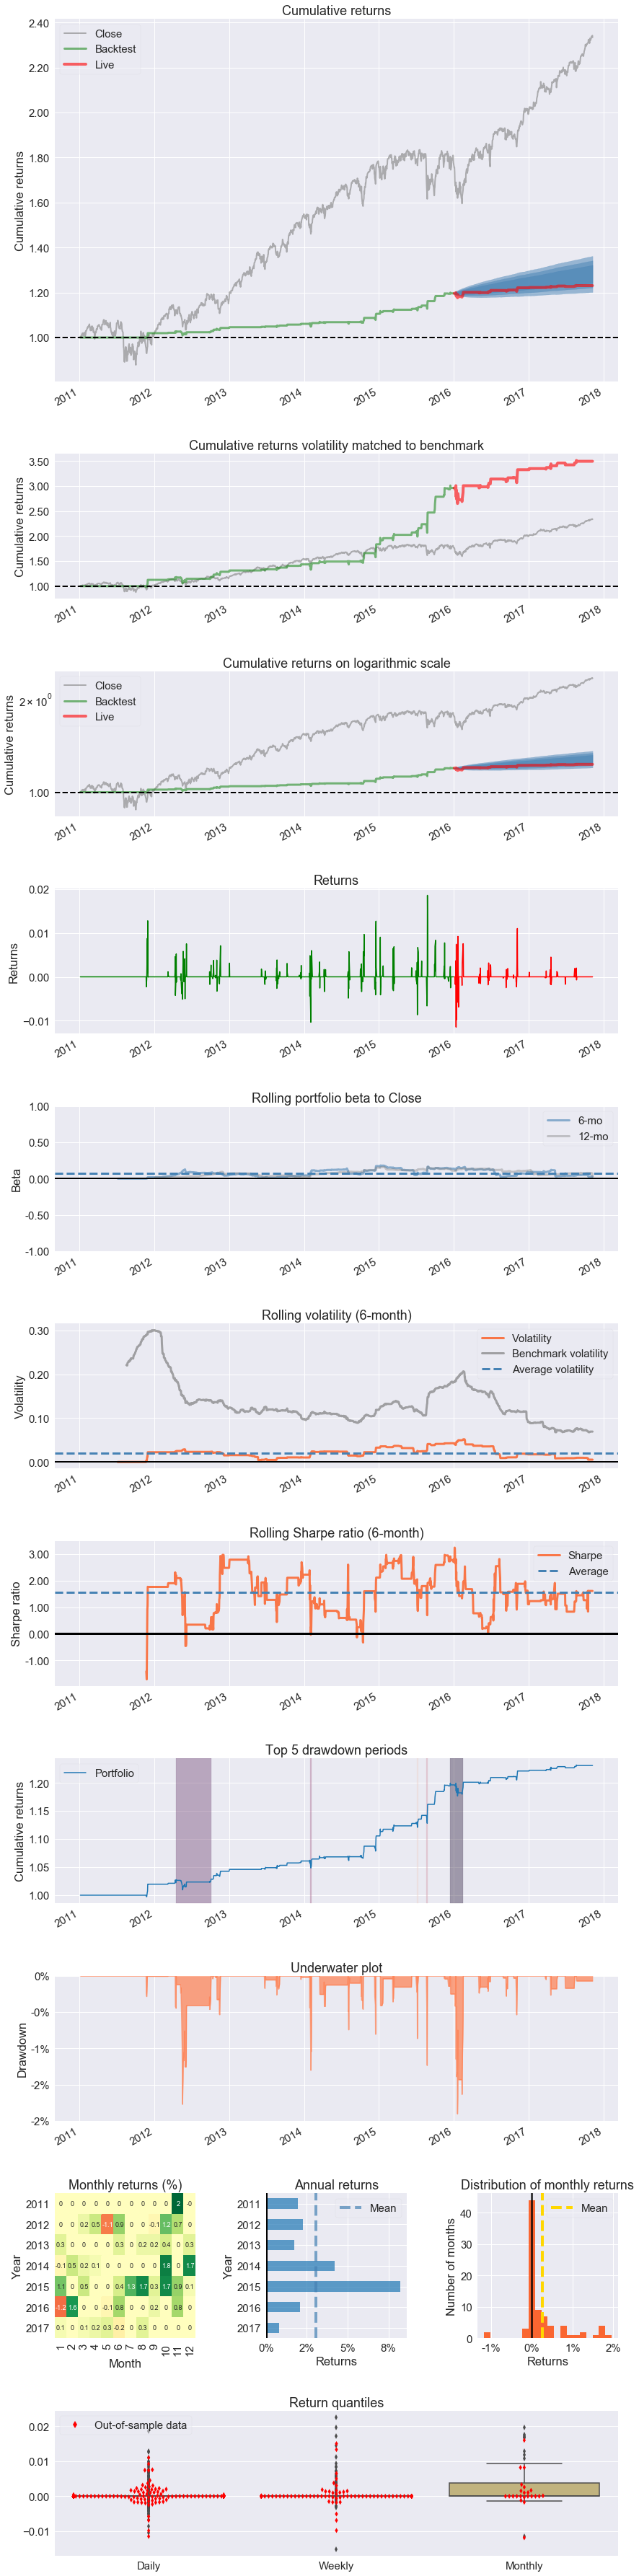

Stress Events,mean,min,max
US downgrade/European Debt Crisis,0.00%,0.00%,0.00%
Fukushima,0.00%,0.00%,0.00%
EZB IR Event,0.02%,-0.17%,0.27%
Apr14,0.01%,-0.34%,0.17%
Oct14,0.08%,-0.34%,0.97%
Fall2015,0.06%,-0.66%,1.86%
Recovery,0.01%,-0.51%,1.28%
New Normal,0.01%,-1.15%,1.86%


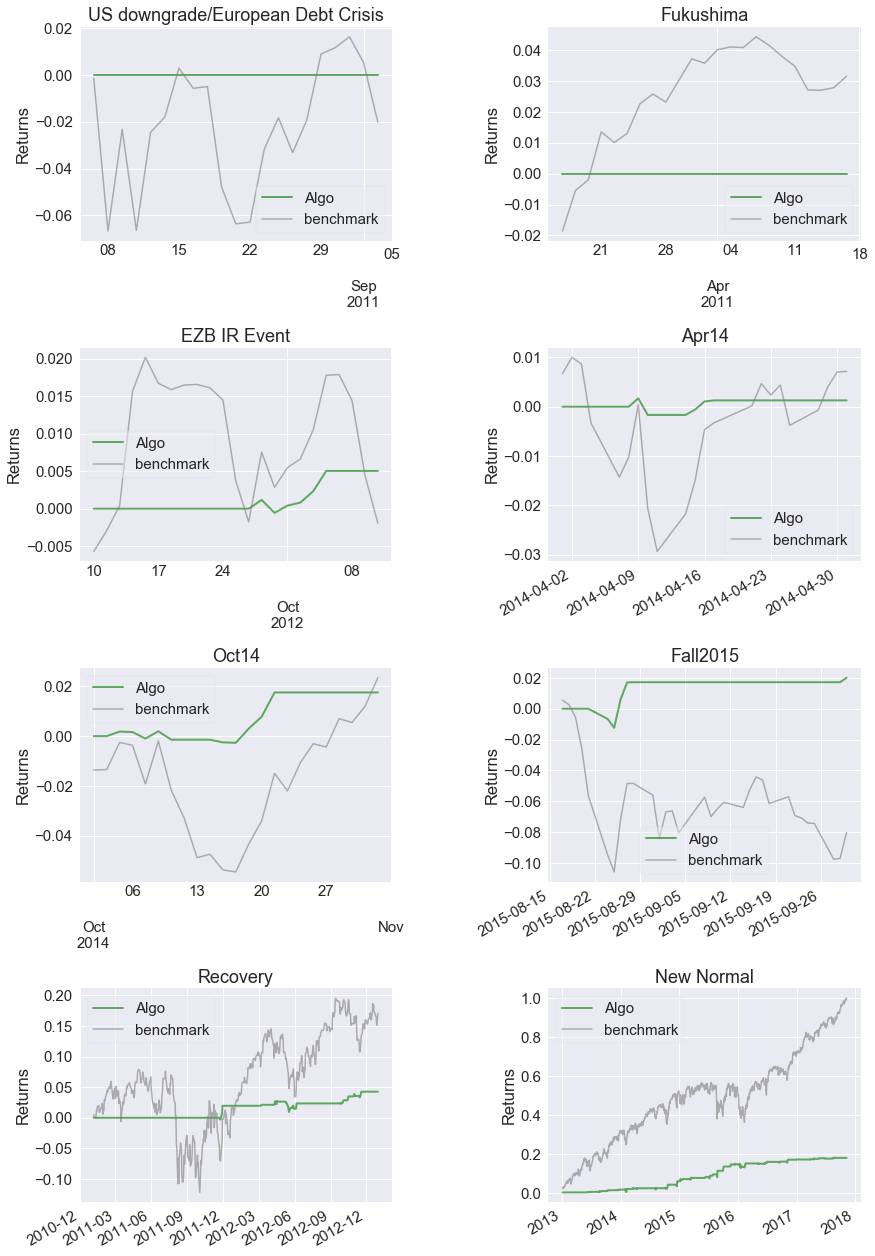

Top 10 long positions of all time,max
SPY,58.80%


Top 10 short positions of all time,max


Top 10 positions of all time,max
SPY,58.80%


All positions ever held,max
SPY,58.80%


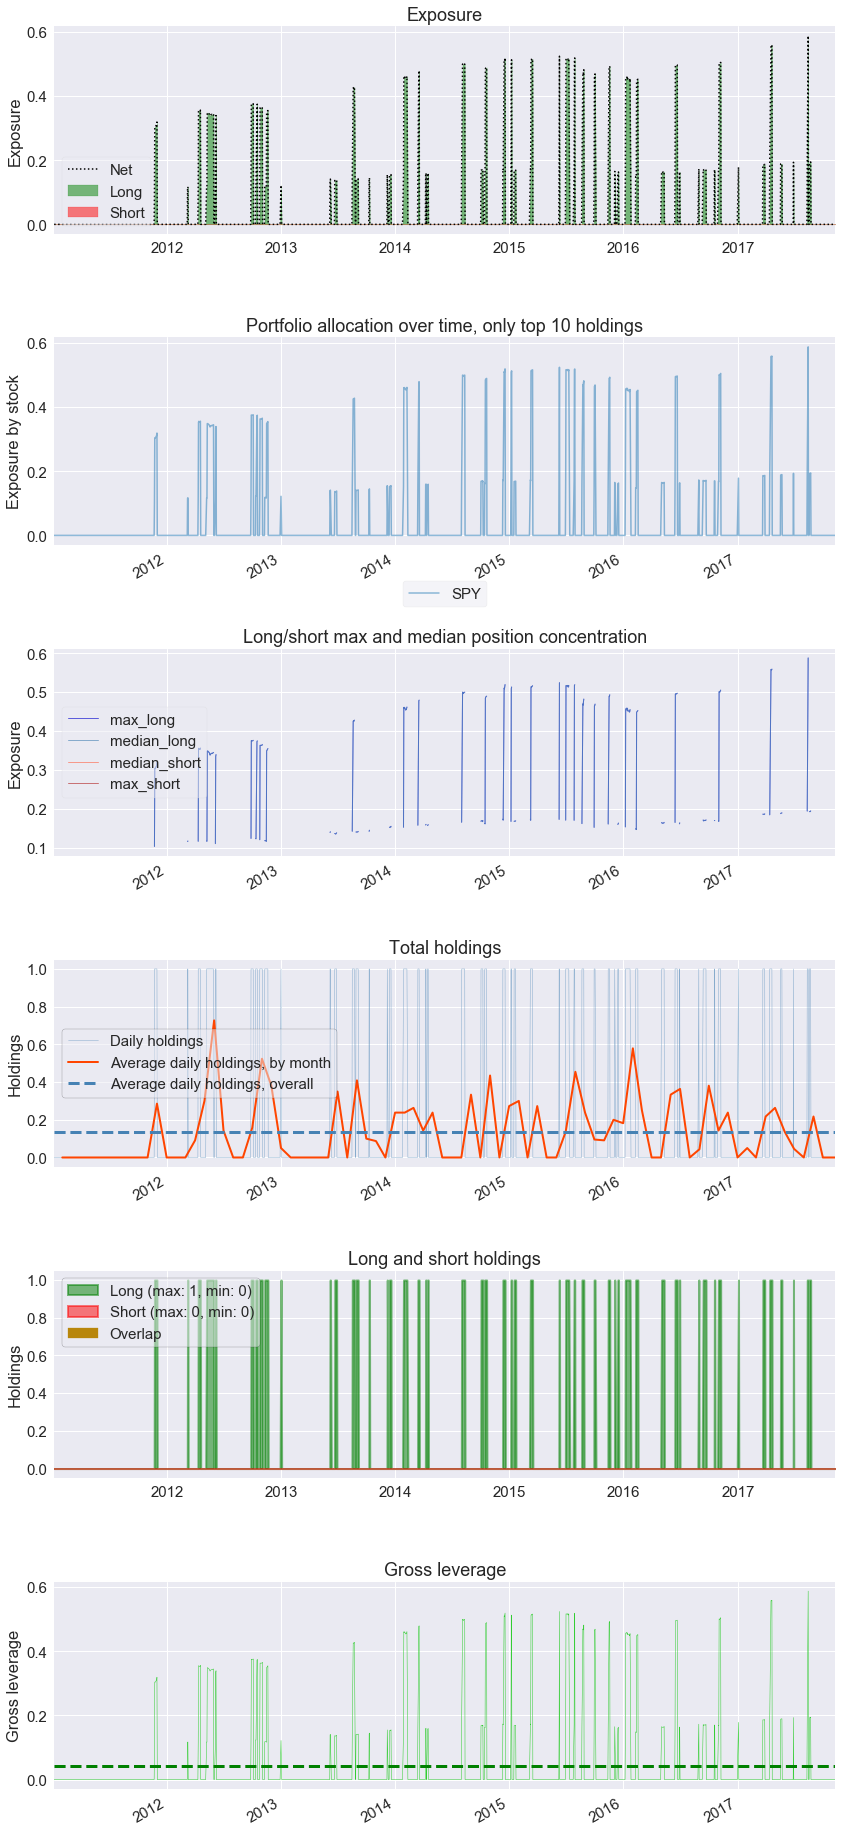

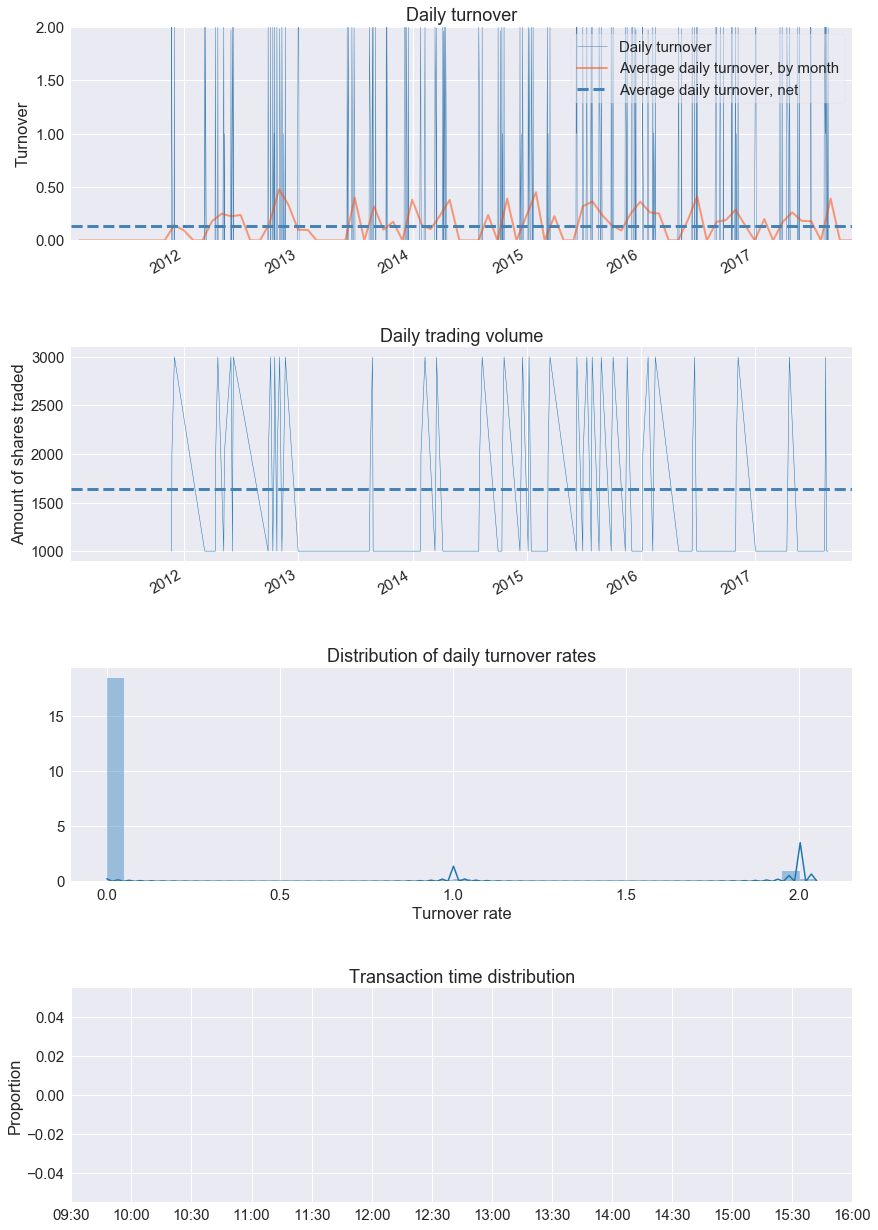

ValueError: You are trying to merge on datetime64[ns, UTC] and datetime64[ns] columns. If you wish to proceed you should use pd.concat

In [45]:
# run tear sheet
pf.create_full_tear_sheet(
    returns,
    positions=positions,
    transactions=transactions,
    benchmark_rets=spy_rets,
live_start_date='2016-01-01',
round_trips=True)